In [1]:
import pandas as pd
from FuzzyTM import FLSA_W
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# import the data
path = '../Assignment-1/Dataset/assignment-2-data.csv'
df_cleaned = pd.read_csv(path)

df_cleaned['new_tokenized'] = df_cleaned['clean_content'].apply(lambda x: x.split())

df_cleaned

id ticker                                              title  \
0     221539    NIO  A Central Bank War Just Started And Its Good F...   
1     221547    NIO         6 Stocks To Watch  Nivida Could Be Falling   
2     221572    NIO  Stocks   Dow Drops Nearly 400 Points as Apple ...   
3     221597   UBER                     The Best Of CES 2020  Revised    
4     221614   UBER                               The Best Of CES 2020   
...      ...    ...                                                ...   
3098  442657    AMD    Here s Why Nvidia  NVDA  Stock Is Gaining Today   
3099  442682    AMD      4 Stocks To Watch Today  ATW  CWEI  MXL  SLCA   
3100  442705    AMD  Here s What The Buy Side Expects From AMD Thur...   
3101  442984      T  Zacks com Featured Highlights  AT T  Nu Skin E...   
3102  442987      T  5 Dividend Growth Stocks To Sail Through Uncer...   

     category                                            content release_date  \
0     opinion  ECB Effects\nThe move in the euro was huge  fa...   2019-03-07   
1     opinion  6 Stocks To Watch  March 6 Trading Session\nSt...   2019-03-06   
2        news  Investing com   A rout in Apple and Facebook  ...   2018-11-19   
3     opinion  With 4 500 companies bringing their innovation...   2020-01-16   
4     opinion  With 4 500 companies bringing their innovation...   2020-01-10   
...       ...                                                ...          ...   
3098  opinion  Shares of Nvidia   NASDAQ NVDA   are up nearly...   2016-09-27   
3099  opinion  It was a pretty good start to the week on Mond...   2016-05-17   
3100  opinion  Advanced Micro Devices Inc   NYSE AMD  is set ...   2014-04-17   
3101  opinion  For Immediate Release\n\nChicago  IL   July 22...   2016-07-21   
3102  opinion  With uncertainty ruling the markets since the ...   2016-07-20   

                       provider  \
0                Michael Kramer   
1                Michael Kramer   
2                 Investing.com   
3     Zacks Investment Research   
4     Zacks Investment Research   
...                         ...   
3098  Zacks Investment Research   
3099                Harry Boxer   
3100                   Estimize   
3101  Zacks Investment Research   
3102  Zacks Investment Research   

                                                    url  article_id  \
0     https://www.investing.com/analysis/a-central-b...   200395687   
1     https://www.investing.com/analysis/6-stocks-to...   200394931   
2     https://www.investing.com/news/stock-market-ne...     1694042   
3     https://www.investing.com/analysis/the-best-of...   200499164   
4     https://www.investing.com/analysis/the-best-of...   200498063   
...                                                 ...         ...   
3098  https://www.investing.com/analysis/here's-why-...   200155860   
3099  https://www.investing.com/analysis/atw,-cwei,-...   200130262   
3100  https://www.investing.com/analysis/here’s-what...      209915   
3101  https://www.investing.com/analysis/zacks.com-f...   200143537   
3102  https://www.investing.com/analysis/5-dividend-...   200143306   

            Date     Open    Close  \
0     2019-03-07  3.77750  3.73150   
1     2019-03-06  3.90400  3.80125   
2     2018-11-19  4.04475  3.61750   
3     2020-01-16  6.19300  6.22325   
4     2020-01-10  6.18325  6.10800   
...          ...      ...      ...   
3098  2016-09-27  1.60225  1.66350   
3099  2016-05-17  1.05000  1.05700   
3100  2014-04-17  0.46050  0.46400   
3101  2016-07-21  1.35250  1.33050   
3102  2016-07-20  1.34250  1.35550   

                                          clean_content  label  \
0     ecb effect move euro huge falling pip huge imp...      0   
1     stock watch march trading session stock stock ...      0   
2     investing com rout apple facebook nasdaq fb mo...      0   
3     company bringing innovation ce jan get really ...      1   
4     company bringing innovation ce jan get really ...      0   
...                  

In [3]:
input_file = df_cleaned['new_tokenized'].to_list()

In [4]:
flsaW = FLSA_W(input_file=input_file, num_topics=10, num_words=10)

print(flsaW.get_vocabulary_size())

pwgt,ptgd = flsaW.get_matrices()

flsaW.show_topics()

for topic in flsaW.show_topics(representation='words'):
  print(topic)

print(flsaW.get_coherence_score())
print(flsaW.get_diversity_score())
print(flsaW.get_interpretability_score())

29908
['composite', 'rose', 'reuters', 'chipmaker', 'mu', 'sporting', 'outperformance', 'hottest', 'combination', 'regular']
['stephen', 'depend', 'jensen', 'shifted', 'biology', 'served', 'pile', 'regardless', 'becoming', 'friendly']
['gmt', 'outnumbered', 'settle', 'slumped', 'vaneck', 'adbe', 'senate', 'flashpoint', 'ixic', 'dax']
['premarket', 'troy', 'smh', 'noel', 'randewich', 'vlkay', 'cac', 'kem', 'kemet', 'unveils']
['theory', 'podcast', 'human', 'century', 'mind', 'author', 'written', 'science', 'old', 'school']
['alv', 'pcg', 'bmwyy', 'icera', 'otcpk', 'nwsa', 'trv', 'nsany', 'chee', 'foo']
['corporation', 'inc', 'gained', 'respectively', 'beat', 'robust', 'solution', 'holding', 'broader', 'investing']
['book', 'evolution', 'richard', 'creativity', 'synthesis', 'inventing', 'certainty', 'feynman', 'professor', 'pretend']
['ounce', 'unchanged', 'philadelphia', 'greenback', 'inbox', 'gainer', 'brent', 'amat', 'nov', 'caterpillar']
['nvidia', 'nvda', 'hold', 'nyse', 'key', 'zac

In [5]:
num_topics_grid = [2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 75, 100, 125, 150, 200, 250, 300, 500]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=2
Topics: [(0, '0.0003*"nasdaq" + 0.0003*"company" + 0.0003*"gmt" + 0.0003*"market" + 0.0003*"stock" + 0.0003*"share" + 0.0003*"also" + 0.0002*"year" + 0.0002*"new" + 0.0002*"nvda"'), (1, '0.0009*"nasdaq" + 0.0009*"nvda" + 0.0008*"nvidia" + 0.0008*"stock" + 0.0008*"company" + 0.0008*"share" + 0.0007*"market" + 0.0007*"top" + 0.0007*"buy" + 0.0007*"nyse"')]
Training FLSA model with num_topics=3
Topics: [(0, '0.0002*"company" + 0.0002*"nasdaq" + 0.0002*"premarket" + 0.0002*"market" + 0.0002*"also" + 0.0002*"stock" + 0.0002*"share" + 0.0002*"troy" + 0.0002*"new" + 0.0002*"year"'), (1, '0.0004*"traded" + 0.0004*"ounce" + 0.0004*"nasdaq" + 0.0004*"company" + 0.0004*"performer" + 0.0004*"market" + 0.0004*"stock" + 0.0004*"worst" + 0.0004*"unchanged" + 0.0004*"share"'), (2, '0.0013*"nvda" + 0.0012*"nasdaq" + 0.0012*"nvidia" + 0.0012*"investing" + 0.0011*"corporation" + 0.0011*"com" + 0.0011*"inc" + 0.0011*"stock" + 0.001*"intc" + 0.001*"rank"')]
Training FL

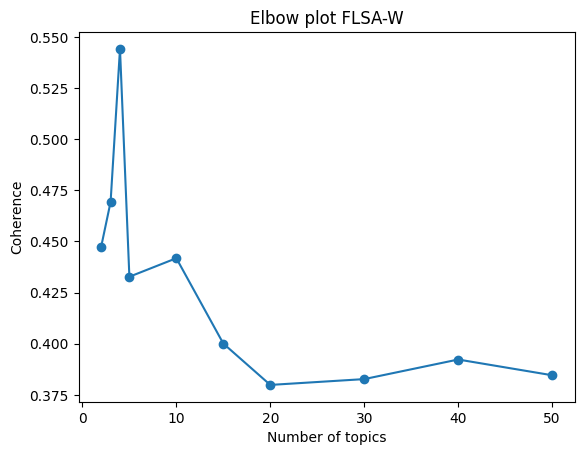

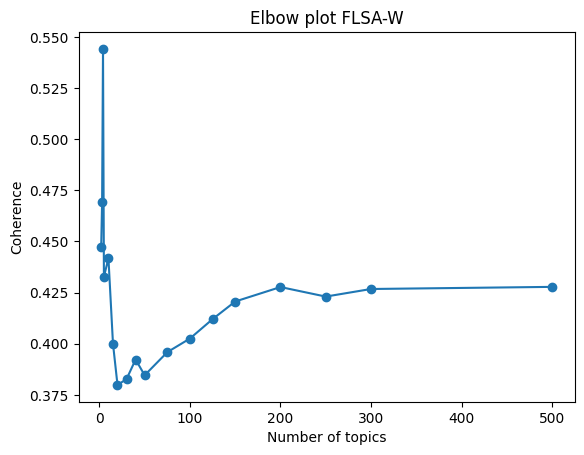

In [6]:
plt.plot(num_topics_grid[:10], coherence_scores[:10], marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

### Iteration 1a

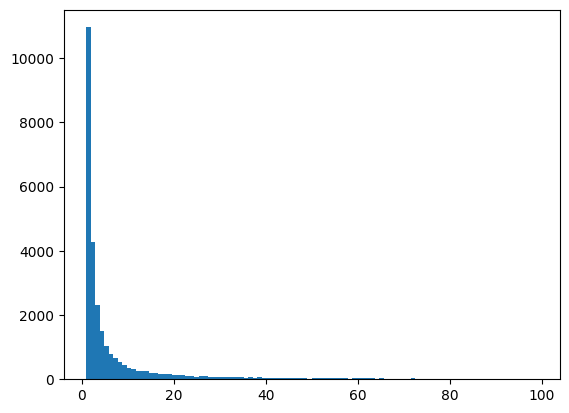

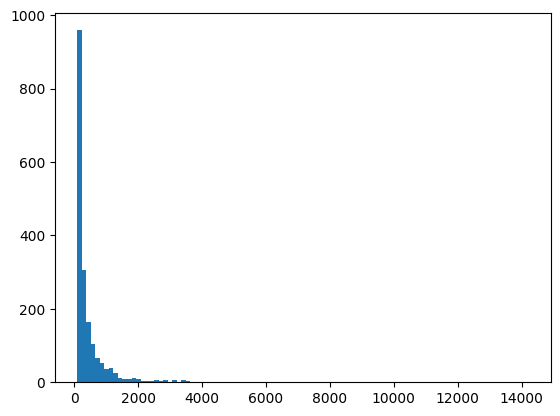

In [7]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

plt.hist(counts[counts<100], bins=100)
plt.show()

plt.hist(counts[counts>100], bins=100)
plt.show()

words_to_filter = words[(counts < 2) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [8]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0136*"cause" + 0.0104*"spread" + 0.0096*"death" + 0.0092*"population" + 0.0079*"severe" + 0.0073*"human" + 0.0071*"young" + 0.0071*"disease" + 0.0052*"originated" + 0.005*"spanish"'), (1, '0.0022*"nvda" + 0.002*"advanced" + 0.002*"intc" + 0.0019*"released" + 0.0019*"reported" + 0.0019*"point" + 0.0019*"among" + 0.0018*"index" + 0.0018*"rank" + 0.0018*"hold"'), (2, '0.0006*"gmt" + 0.0005*"performer" + 0.0005*"outnumbered" + 0.0004*"slumped" + 0.0004*"vector" + 0.0004*"dax" + 0.0004*"advancing" + 0.0004*"aug" + 0.0004*"ounce" + 0.0004*"uncover"'), (3, '0.0011*"traded" + 0.001*"composite" + 0.001*"reuters" + 0.001*"rose" + 0.0009*"lowest" + 0.0009*"exchange" + 0.0008*"donald" + 0.0008*"chipmaker" + 0.0008*"ltd" + 0.0008*"bell"'), (4, '0.0004*"premarket" + 0.0003*"troy" + 0.0002*"wedge" + 0.0002*"cite" + 0.0002*"smh" + 0.0002*"qrvo" + 0.0002*"reiterates" + 0.0002*"vlkay" + 0.0002*"noel" + 0.0002*"randewich"')]
Training FLSA model with n

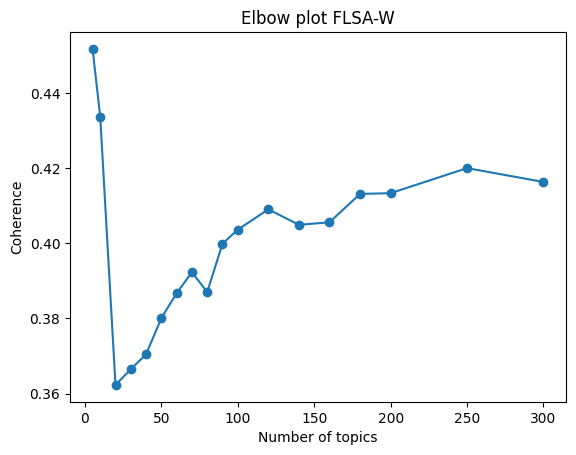

In [9]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [ ]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.406123750159706
Test Diversity Score: 0.9955555555555555
Test Interpretability Score: 0.4043187557145517
Topics: [(0, '0.0078*"84" + 0.0072*"fpga" + 0.0069*"stemming" + 0.0064*"buoy" + 0.0064*"deem" + 0.0063*"allied" + 0.0059*"todayexperts" + 0.0059*"chtr" + 0.0058*"adsk" + 0.0055*"mentioning"'), (1, '0.0247*"presented" + 0.0176*"exceed" + 0.0163*"machinery" + 0.0143*"overcome" + 0.0141*"closest" + 0.0139*"immune" + 0.0132*"staff" + 0.0121*"baby" + 0.012*"controversy" + 0.0114*"false"'), (2, '0.0089*"tm" + 0.0085*"pan" + 0.0068*"exhibit" + 0.0062*"intensified" + 0.0061*"challenged" + 0.0054*"waited" + 0.0054*"sustainability" + 0.0054*"swks" + 0.005*"policymakers" + 0.0049*"nearing"'), (3, '0.0034*"recommends" + 0.0027*"bbry" + 0.0027*"aberdeen" + 0.0026*"ntnx" + 0.0025*"cala" + 0.0025*"25b" + 0.0024*"ceasefire" + 0.0024*"07m" + 0.0024*"83m" + 0.0024*"perrigo"'), (4, '0.0992*"favorite" + 0.0793*"official" + 0.0728*"cook" + 0.0716*"article" + 0.0615*"typically" + 

### Iteration 1b

In [11]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [12]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0016*"corporation" + 0.0015*"gained" + 0.0015*"com" + 0.0014*"nvda" + 0.0014*"corp" + 0.0014*"investing" + 0.0013*"session" + 0.0013*"intc" + 0.0012*"released" + 0.0012*"rising"'), (1, '0.0004*"premarket" + 0.0003*"smh" + 0.0003*"troy" + 0.0003*"thomson" + 0.0003*"conclusively" + 0.0002*"nvda" + 0.0002*"implied" + 0.0002*"mcqueeney" + 0.0002*"cite" + 0.0002*"time"'), (2, '0.0161*"expect" + 0.0154*"generation" + 0.0131*"executive" + 0.013*"gross" + 0.013*"margin" + 0.0126*"half" + 0.0121*"know" + 0.012*"chief" + 0.0118*"think" + 0.0116*"president"'), (3, '0.0035*"compared" + 0.0035*"graphic" + 0.0035*"gpus" + 0.0034*"basis" + 0.0034*"cash" + 0.0033*"highest" + 0.0033*"non" + 0.0032*"fourth" + 0.0032*"expanding" + 0.0032*"expense"'), (4, '0.0005*"traded" + 0.0005*"performer" + 0.0005*"advancing" + 0.0005*"inbox" + 0.0005*"previously" + 0.0005*"basket" + 0.0005*"philadelphia" + 0.0005*"upbeat" + 0.0005*"unchanged" + 0.0005*"gmt"')]
Tra

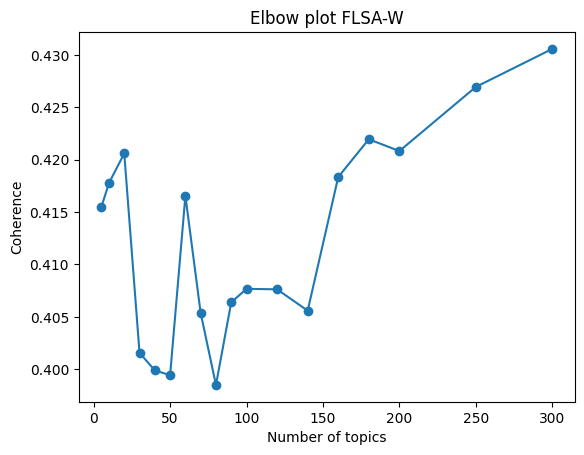

In [13]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [ ]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.41111432596234754
Test Diversity Score: 0.9991666666666666
Test Interpretability Score: 0.41077173069071227
Topics: [(0, '0.0065*"mcqueeney" + 0.0063*"ipgp" + 0.0061*"07" + 0.0046*"refinitiv" + 0.0045*"pendinga" + 0.0043*"alive" + 0.0042*"obtain" + 0.0041*"distill" + 0.004*"02" + 0.0039*"83"'), (1, '0.003*"solactive" + 0.0026*"deteriorate" + 0.0025*"diod" + 0.0025*"momo" + 0.0025*"etfmg" + 0.0025*"cannabis" + 0.0024*"notching" + 0.0024*"reassessed" + 0.0023*"tlry" + 0.0023*"visiting"'), (2, '0.0194*"rated" + 0.0174*"esp" + 0.0146*"belongs" + 0.0136*"skyrocket" + 0.0127*"80" + 0.0127*"carrying" + 0.0122*"65" + 0.0111*"witness" + 0.0107*"broadcom" + 0.0106*"wherein"'), (3, '0.0293*"audio" + 0.0249*"copy" + 0.0217*"watt" + 0.0174*"weighted" + 0.0173*"lay" + 0.016*"optimize" + 0.0136*"13" + 0.0127*"headquarters" + 0.0119*"wondering" + 0.0118*"highlighted"'), (4, '0.0379*"design" + 0.0329*"positioned" + 0.0302*"efficiency" + 0.0258*"stage" + 0.0234*"series" + 0.0227*

### Iteration 1c

In [15]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 4000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [16]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0038*"compared" + 0.0037*"graphic" + 0.0036*"cash" + 0.0036*"gpus" + 0.0036*"fourth" + 0.0036*"basis" + 0.0035*"ago" + 0.0035*"non" + 0.0035*"segment" + 0.0035*"computing"'), (1, '0.0006*"previously" + 0.0006*"ltd" + 0.0006*"traded" + 0.0005*"inbox" + 0.0005*"amat" + 0.0005*"ratio" + 0.0005*"nov" + 0.0005*"cryptocurrency" + 0.0005*"contract" + 0.0005*"reuters"'), (2, '0.0167*"generation" + 0.0166*"expect" + 0.0143*"margin" + 0.0138*"executive" + 0.0136*"gross" + 0.0132*"half" + 0.0127*"know" + 0.0125*"chief" + 0.0123*"think" + 0.012*"server"'), (3, '0.0005*"premarket" + 0.0003*"thomson" + 0.0003*"smh" + 0.0003*"avoided" + 0.0003*"conclusively" + 0.0003*"gmt" + 0.0003*"strategiesit" + 0.0003*"mcqueeney" + 0.0003*"soxx" + 0.0003*"uncover"'), (4, '0.0018*"corporation" + 0.0017*"nvda" + 0.0016*"investing" + 0.0016*"com" + 0.0016*"gained" + 0.0015*"intc" + 0.0015*"released" + 0.0015*"corp" + 0.0014*"note" + 0.0014*"read"')]
Training FLSA

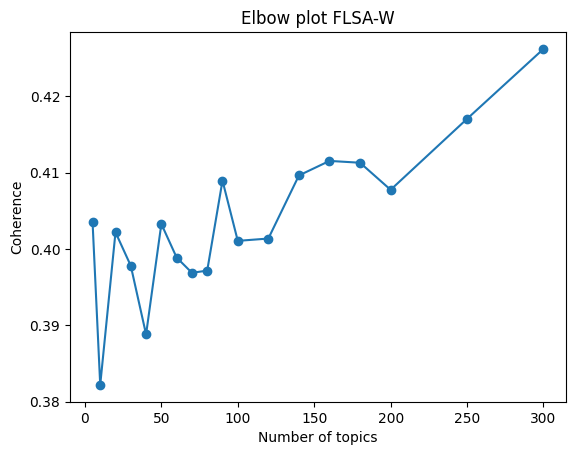

In [17]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [18]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4032101155080479
Test Diversity Score: 0.999
Test Interpretability Score: 0.4028069053925399
Topics: [(0, '0.0344*"com" + 0.0287*"meanwhile" + 0.026*"buying" + 0.0246*"general" + 0.0235*"monthly" + 0.0228*"described" + 0.021*"wall" + 0.0191*"among" + 0.018*"reflect" + 0.0162*"event"'), (1, '0.0114*"warning" + 0.0105*"forced" + 0.0104*"slower" + 0.0102*"immediately" + 0.01*"sending" + 0.0097*"pulled" + 0.0091*"unknown" + 0.0091*"officially" + 0.0089*"newsletter" + 0.0088*"theory"'), (2, '0.0239*"calculation" + 0.0235*"totaled" + 0.0201*"45" + 0.0189*"microprocessor" + 0.0166*"fundamentally" + 0.0138*"layer" + 0.0126*"luck" + 0.0124*"hpc" + 0.0117*"establish" + 0.0103*"equivalent"'), (3, '0.0316*"gained" + 0.0207*"led" + 0.0193*"read" + 0.0168*"advice" + 0.0157*"constitutes" + 0.014*"displayed" + 0.0138*"manufacturing" + 0.0135*"opinion" + 0.0134*"regulatory" + 0.0134*"face"'), (4, '0.006*"beverage" + 0.0057*"sought" + 0.0056*"sends" + 0.005*"minor" + 0.005*"rebou

### Iteration 1d

In [19]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 2) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [20]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.002*"advanced" + 0.002*"intc" + 0.0019*"released" + 0.0019*"reported" + 0.0018*"among" + 0.0018*"broader" + 0.0018*"com" + 0.0018*"believe" + 0.0018*"rising" + 0.0017*"hold"'), (1, '0.0006*"gmt" + 0.0005*"performer" + 0.0005*"outnumbered" + 0.0005*"slumped" + 0.0004*"vector" + 0.0004*"uncover" + 0.0004*"dax" + 0.0004*"advancing" + 0.0004*"aug" + 0.0004*"incorporated"'), (2, '0.0012*"traded" + 0.001*"composite" + 0.001*"reuters" + 0.001*"rose" + 0.001*"lowest" + 0.0009*"exchange" + 0.0009*"donald" + 0.0009*"ltd" + 0.0008*"previously" + 0.0008*"bell"'), (3, '0.0004*"premarket" + 0.0003*"troy" + 0.0003*"wedge" + 0.0002*"smh" + 0.0002*"cite" + 0.0002*"qrvo" + 0.0002*"reiterates" + 0.0002*"vlkay" + 0.0002*"noel" + 0.0002*"randewich"'), (4, '0.014*"cause" + 0.0108*"spread" + 0.0099*"death" + 0.0096*"population" + 0.0082*"severe" + 0.0073*"disease" + 0.0072*"human" + 0.0072*"young" + 0.0054*"originated" + 0.0052*"spanish"')]
Training FLSA 

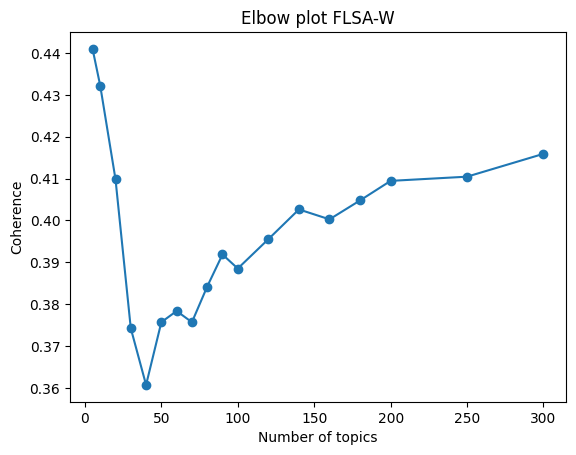

In [21]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [ ]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.3973416285204542
Test Diversity Score: 0.996875
Test Interpretability Score: 0.39609993593132775
Topics: [(0, '0.0066*"shortfall" + 0.0065*"timely" + 0.0063*"needing" + 0.0059*"predominantly" + 0.0057*"mcdonald" + 0.0056*"stall" + 0.0054*"bartosiak" + 0.0053*"productive" + 0.005*"rr" + 0.005*"inconsistent"'), (1, '0.0484*"conquer" + 0.0479*"marco" + 0.0468*"isolated" + 0.0414*"davos" + 0.041*"whichever" + 0.0404*"novavax" + 0.0404*"nvax" + 0.0354*"wikipedia" + 0.0354*"inventing" + 0.0347*"severe"'), (2, '0.0125*"breach" + 0.0118*"creates" + 0.0105*"chase" + 0.01*"partial" + 0.0096*"jpm" + 0.0092*"committee" + 0.009*"slowly" + 0.0085*"otc" + 0.0084*"bounce" + 0.0078*"spy"'), (3, '0.0077*"mbly" + 0.0071*"hugely" + 0.0069*"random" + 0.0064*"ugly" + 0.006*"transformed" + 0.0058*"robo" + 0.0056*"appointment" + 0.0056*"bolan" + 0.0056*"corrected" + 0.0056*"acronym"'), (4, '0.0154*"troy" + 0.0069*"refinitiv" + 0.0058*"amazonzacks" + 0.0046*"outperformers" + 0.0044*"dec

### Iteration 1e

In [23]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [24]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0005*"traded" + 0.0005*"performer" + 0.0005*"advancing" + 0.0005*"inbox" + 0.0005*"unchanged" + 0.0005*"philadelphia" + 0.0005*"gainer" + 0.0005*"basket" + 0.0005*"upbeat" + 0.0005*"towards"'), (1, '0.0173*"expect" + 0.0161*"generation" + 0.014*"gross" + 0.014*"executive" + 0.0135*"half" + 0.0133*"margin" + 0.013*"know" + 0.0129*"chief" + 0.0126*"think" + 0.0125*"president"'), (2, '0.0004*"premarket" + 0.0003*"troy" + 0.0003*"smh" + 0.0003*"thomson" + 0.0003*"implied" + 0.0003*"conclusively" + 0.0002*"mcqueeney" + 0.0002*"cite" + 0.0002*"nellis" + 0.0002*"delve"'), (3, '0.004*"graphic" + 0.0038*"gpus" + 0.0038*"cash" + 0.0037*"compared" + 0.0037*"highest" + 0.0037*"basis" + 0.0037*"fourth" + 0.0036*"expanding" + 0.0036*"non" + 0.0035*"operating"'), (4, '0.0016*"corporation" + 0.0015*"gained" + 0.0014*"corp" + 0.0014*"com" + 0.0014*"session" + 0.0013*"investing" + 0.0013*"intc" + 0.0012*"released" + 0.0012*"read" + 0.0012*"lost"')]
T

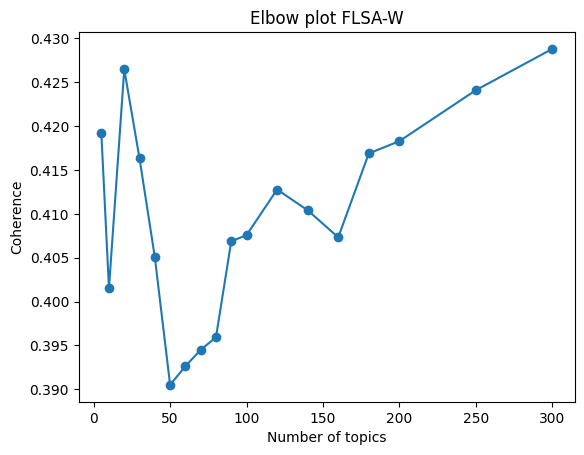

In [25]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [ ]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4044542551324118
Test Diversity Score: 0.9983333333333333
Test Interpretability Score: 0.4037801647071911
Topics: [(0, '0.0455*"benefit" + 0.042*"competition" + 0.0384*"machine" + 0.0335*"turn" + 0.0312*"addition" + 0.0284*"add" + 0.0283*"provider" + 0.0278*"player" + 0.0223*"believe" + 0.0205*"guidance"'), (1, '0.039*"design" + 0.0345*"positioned" + 0.0336*"moment" + 0.0283*"efficiency" + 0.0223*"subscriber" + 0.0209*"definitely" + 0.0199*"series" + 0.0171*"easier" + 0.0166*"unique" + 0.0133*"fully"'), (2, '0.0079*"ag" + 0.007*"wfc" + 0.007*"fewer" + 0.0069*"parameter" + 0.0067*"verge" + 0.0066*"friendly" + 0.006*"gps" + 0.0059*"48" + 0.0057*"fail" + 0.0051*"fellow"'), (3, '0.0132*"citing" + 0.0115*"tomorrow" + 0.0109*"lon" + 0.01*"develops" + 0.0098*"aim" + 0.0098*"dec" + 0.0093*"breaking" + 0.0092*"heat" + 0.0091*"uber" + 0.0086*"named"'), (4, '0.0306*"pegged" + 0.0289*"bps" + 0.0236*"card" + 0.0158*"scandal" + 0.0155*"switching" + 0.0154*"mistake" + 0.0154*"

### Iteration 1f

In [27]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 2000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [28]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0045*"graphic" + 0.0043*"fourth" + 0.0043*"cash" + 0.0041*"gpus" + 0.0041*"expanding" + 0.004*"non" + 0.004*"ago" + 0.004*"operating" + 0.0039*"compared" + 0.0039*"basis"'), (1, '0.0182*"expect" + 0.0179*"generation" + 0.0151*"executive" + 0.015*"gross" + 0.0145*"margin" + 0.0144*"half" + 0.014*"know" + 0.0139*"chief" + 0.0135*"think" + 0.0128*"president"'), (2, '0.0005*"premarket" + 0.0003*"thomson" + 0.0003*"gmt" + 0.0003*"troy" + 0.0003*"smh" + 0.0003*"implied" + 0.0003*"conclusively" + 0.0003*"avoided" + 0.0003*"strategiesit" + 0.0003*"mcqueeney"'), (3, '0.0006*"traded" + 0.0006*"previously" + 0.0006*"ltd" + 0.0005*"inbox" + 0.0005*"amat" + 0.0005*"ratio" + 0.0005*"nov" + 0.0005*"advancing" + 0.0005*"cryptocurrency" + 0.0005*"bidu"'), (4, '0.0018*"corporation" + 0.0016*"investing" + 0.0016*"gained" + 0.0016*"com" + 0.0015*"corp" + 0.0015*"intc" + 0.0014*"released" + 0.0014*"rising" + 0.0014*"read" + 0.0014*"note"')]
Training FLS

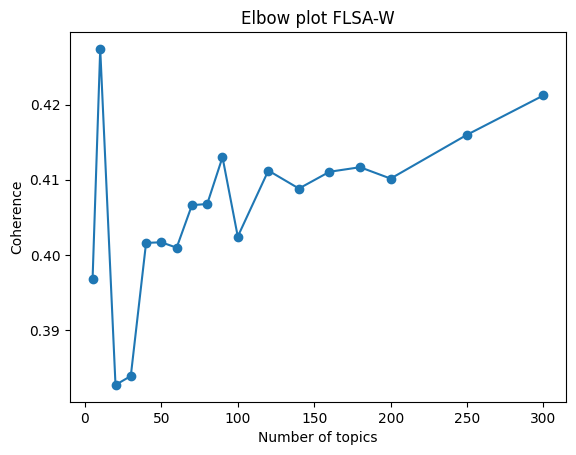

In [29]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [ ]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4129591968904362
Test Diversity Score: 0.9957142857142857
Test Interpretability Score: 0.41118937176090575
Topics: [(0, '0.0213*"remarkable" + 0.0187*"instrument" + 0.0148*"proven" + 0.0141*"sox" + 0.0138*"ev" + 0.013*"named" + 0.0125*"visual" + 0.0115*"taiwan" + 0.0114*"owner" + 0.0109*"fan"'), (1, '0.0587*"semi" + 0.0501*"console" + 0.0452*"nanometer" + 0.0417*"chief" + 0.0361*"guess" + 0.0349*"ok" + 0.0322*"mix" + 0.028*"seasonality" + 0.0265*"negligible" + 0.0263*"matt"'), (2, '0.0109*"muscular" + 0.0109*"dystrophy" + 0.0109*"leukemia" + 0.0095*"56" + 0.0091*"taxi" + 0.009*"expe" + 0.0083*"elite" + 0.0082*"hemophilia" + 0.0078*"compelled" + 0.0077*"equifax"'), (3, '0.0337*"july" + 0.0311*"weekly" + 0.0308*"closed" + 0.0231*"falling" + 0.022*"showed" + 0.0219*"fell" + 0.0199*"td" + 0.0199*"ameritrade" + 0.0187*"claim" + 0.0186*"illustrative"'), (4, '0.0291*"tsla" + 0.024*"told" + 0.0239*"push" + 0.0175*"agreed" + 0.0165*"author" + 0.0158*"century" + 0.0155*"p

### Iteration 1g

In [31]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 2) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [32]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0009*"gmt" + 0.0006*"outnumbered" + 0.0004*"troy" + 0.0004*"advancer" + 0.0004*"decliners" + 0.0004*"vaneck" + 0.0004*"jinping" + 0.0004*"implied" + 0.0004*"thomson" + 0.0004*"nellis"'), (1, '0.0026*"investing" + 0.0023*"released" + 0.0023*"read" + 0.0022*"rising" + 0.0022*"four" + 0.0022*"believe" + 0.0022*"broader" + 0.0021*"intc" + 0.0021*"stand" + 0.0021*"among"'), (2, '0.0014*"composite" + 0.0014*"reuters" + 0.0013*"exchange" + 0.0012*"chipmaker" + 0.0012*"jones" + 0.0011*"hottest" + 0.0011*"york" + 0.0011*"lowest" + 0.0011*"outperformance" + 0.0011*"mu"'), (3, '0.0009*"ounce" + 0.0008*"unchanged" + 0.0007*"philadelphia" + 0.0007*"gainer" + 0.0007*"brent" + 0.0007*"towards" + 0.0007*"inbox" + 0.0007*"bidu" + 0.0007*"greenback" + 0.0006*"weighed"'), (4, '0.0003*"wedge" + 0.0003*"premarket" + 0.0003*"reiterates" + 0.0003*"qrvo" + 0.0003*"xsd" + 0.0003*"cy" + 0.0002*"alv" + 0.0002*"aftermarket" + 0.0002*"vlkay" + 0.0002*"cite"')]


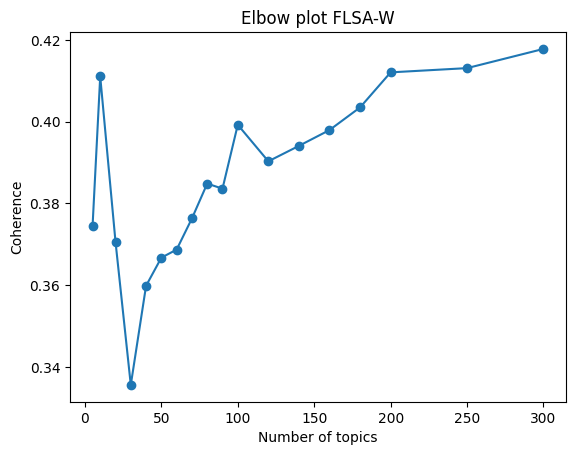

In [33]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [34]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.3885468000541965
Test Diversity Score: 1.0
Test Interpretability Score: 0.3885468000541965
Topics: [(0, '0.0409*"placed" + 0.0376*"city" + 0.0369*"innovator" + 0.0337*"theory" + 0.0318*"conclusion" + 0.0312*"train" + 0.027*"frequently" + 0.0224*"anywhere" + 0.0198*"responsible" + 0.0195*"absolutely"'), (1, '0.0238*"ranked" + 0.0188*"returned" + 0.0179*"mainly" + 0.0173*"iot" + 0.0171*"delivered" + 0.0167*"weaker" + 0.016*"additionally" + 0.0151*"continuing" + 0.0124*"largely" + 0.0123*"tablet"'), (2, '0.016*"lucky" + 0.0119*"evolutionary" + 0.0106*"judgement" + 0.0099*"bernie" + 0.0097*"euphoric" + 0.0093*"thaler" + 0.0092*"endless" + 0.0082*"summed" + 0.0082*"church" + 0.008*"discovering"'), (3, '0.0123*"present" + 0.0108*"autonomous" + 0.0099*"reuters" + 0.0091*"proprietary" + 0.009*"insider" + 0.0086*"handle" + 0.0084*"utility" + 0.0081*"managed" + 0.0078*"failed" + 0.0074*"composite"'), (4, '0.0752*"favorite" + 0.0731*"official" + 0.0707*"article" + 0.0585*"

### Iteration 1h

In [35]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [36]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0022*"investing" + 0.0021*"intc" + 0.0019*"respectively" + 0.0018*"rising" + 0.0018*"released" + 0.0017*"added" + 0.0017*"bottom" + 0.0017*"boost" + 0.0017*"trend" + 0.0017*"following"'), (1, '0.0013*"traded" + 0.0009*"ltd" + 0.0009*"reuters" + 0.0009*"worst" + 0.0009*"bell" + 0.0009*"composite" + 0.0009*"previously" + 0.0009*"chipmakers" + 0.0008*"mu" + 0.0008*"york"'), (2, '0.0149*"expect" + 0.0139*"generation" + 0.0125*"half" + 0.0123*"president" + 0.0111*"executive" + 0.0108*"gross" + 0.0108*"processor" + 0.0107*"seven" + 0.0105*"server" + 0.0101*"driven"'), (3, '0.0007*"gmt" + 0.0006*"performer" + 0.0005*"outnumbered" + 0.0005*"slumped" + 0.0005*"vector" + 0.0005*"incorporated" + 0.0005*"advancing" + 0.0005*"inched" + 0.0004*"esp" + 0.0004*"rated"'), (4, '0.0005*"premarket" + 0.0004*"smh" + 0.0003*"troy" + 0.0003*"cite" + 0.0003*"conclusively" + 0.0003*"polled" + 0.0003*"wedge" + 0.0003*"qrvo" + 0.0003*"kemet" + 0.0003*"kem"')]

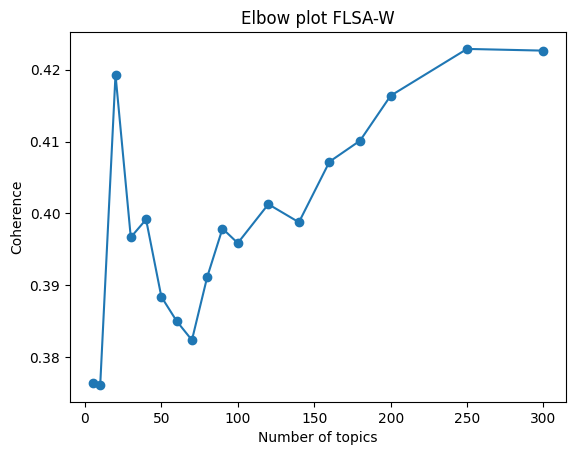

In [37]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [ ]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.41454608715532915
Test Diversity Score: 0.9911111111111112
Test Interpretability Score: 0.4108612330472818
Topics: [(0, '0.0187*"settle" + 0.0112*"confirms" + 0.0108*"breathtaking" + 0.0104*"reprieve" + 0.0104*"iranian" + 0.0104*"policymakers" + 0.01*"zealand" + 0.0087*"farming" + 0.0083*"detected" + 0.0079*"unforeseen"'), (1, '0.0398*"pegged" + 0.0396*"owing" + 0.0227*"gamble" + 0.0223*"immersive" + 0.0214*"sponsor" + 0.0186*"engineering" + 0.0178*"shaping" + 0.0167*"embracing" + 0.0163*"symbol" + 0.0132*"genuine"'), (2, '0.0121*"triangle" + 0.01*"therapeutic" + 0.0089*"halt" + 0.0085*"jitter" + 0.0082*"xle" + 0.0077*"henry" + 0.0069*"pivoted" + 0.0066*"regularly" + 0.0058*"worthy" + 0.0057*"widened"'), (3, '0.027*"instrument" + 0.0223*"remarkable" + 0.0208*"2x" + 0.0156*"performed" + 0.0155*"apart" + 0.0154*"consideration" + 0.0141*"follows" + 0.0139*"score" + 0.0134*"proven" + 0.0122*"ecosystem"'), (4, '0.0571*"considerably" + 0.0412*"calculation" + 0.0315*"e

### Iteration 1i

In [39]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 5) | (counts > 1000)]

input_file_ = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [40]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250, 300]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file_, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

Training FLSA model with num_topics=5
Topics: [(0, '0.0005*"premarket" + 0.0005*"troy" + 0.0004*"gmt" + 0.0004*"implied" + 0.0004*"thomson" + 0.0003*"smh" + 0.0003*"conclusively" + 0.0003*"avoided" + 0.0003*"soxx" + 0.0003*"strategiesit"'), (1, '0.0055*"fourth" + 0.005*"expanding" + 0.0048*"primarily" + 0.0047*"gpu" + 0.0047*"gpus" + 0.0044*"opportunity" + 0.0044*"income" + 0.0044*"sachs" + 0.0043*"pc" + 0.0042*"client"'), (2, '0.0016*"session" + 0.0015*"investing" + 0.0015*"intc" + 0.0014*"respectively" + 0.0014*"released" + 0.0014*"surged" + 0.0013*"rising" + 0.0013*"read" + 0.0013*"boost" + 0.0013*"note"'), (3, '0.0006*"traded" + 0.0006*"previously" + 0.0006*"inbox" + 0.0006*"amat" + 0.0005*"nov" + 0.0005*"ratio" + 0.0005*"advancing" + 0.0005*"philadelphia" + 0.0005*"ltd" + 0.0005*"proven"'), (4, '0.0207*"expect" + 0.0196*"generation" + 0.0172*"executive" + 0.0169*"gross" + 0.0162*"half" + 0.0161*"know" + 0.016*"chief" + 0.0153*"think" + 0.015*"president" + 0.0146*"question"')]
Trai

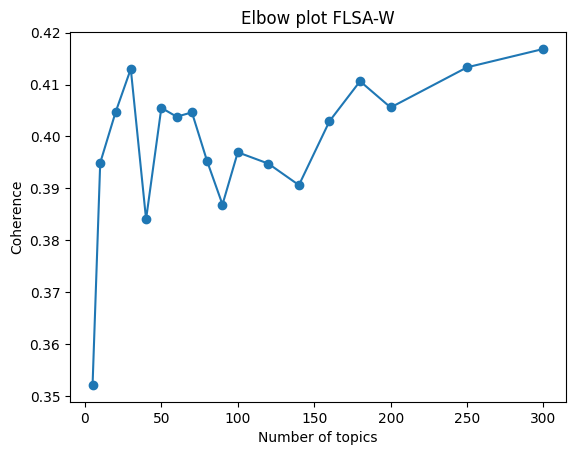

In [41]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [ ]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file_, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.3987173163397519
Test Diversity Score: 0.995
Test Interpretability Score: 0.39672372975805315
Topics: [(0, '0.1013*"fourth" + 0.0775*"pc" + 0.069*"grew" + 0.0636*"certainly" + 0.0526*"income" + 0.0426*"couple" + 0.0309*"client" + 0.0246*"shipment" + 0.0236*"percentage" + 0.0223*"sure"'), (1, '0.0106*"vulnerable" + 0.0102*"consolidation" + 0.0097*"ryniec" + 0.0095*"mood" + 0.009*"advancing" + 0.0086*"towards" + 0.0085*"occasion" + 0.008*"investigating" + 0.0075*"usa" + 0.0073*"weapon"'), (2, '0.0191*"texas" + 0.0181*"15" + 0.0168*"ltd" + 0.0162*"deeper" + 0.0157*"dominance" + 0.0145*"200" + 0.0137*"generating" + 0.0136*"station" + 0.0134*"applied" + 0.013*"premium"'), (3, '0.0084*"tit" + 0.0084*"tat" + 0.0074*"devastating" + 0.0068*"hillary" + 0.0067*"redbook" + 0.0065*"riskier" + 0.0065*"pave" + 0.0061*"friction" + 0.0057*"sino" + 0.0055*"drawdown"'), (4, '0.0146*"utilized" + 0.0123*"145" + 0.012*"gtx" + 0.0118*"catering" + 0.0117*"renewal" + 0.0117*"hdd" + 0.01

#### The sub-iteration with the highest coherence: 1b

In [48]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

words_to_filter = words[(counts < 3) | (counts > 4000)]

input_file = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

### Iteration 2

In [49]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4019504618190779
Test Diversity Score: 0.999
Test Interpretability Score: 0.40154851135725883
Topics: [(0, '0.0297*"achieve" + 0.0281*"deployment" + 0.0237*"installed" + 0.0229*"goldman" + 0.0193*"cross" + 0.0188*"resulted" + 0.0185*"excellent" + 0.0138*"morgan" + 0.0133*"prior" + 0.0119*"highest"'), (1, '0.009*"gmt" + 0.007*"advancer" + 0.0054*"capped" + 0.0047*"criticism" + 0.0045*"stalled" + 0.0044*"jinping" + 0.0044*"decliners" + 0.0043*"evans" + 0.0041*"ugly" + 0.0039*"agriculture"'), (2, '0.0072*"stx" + 0.0072*"hemophilia" + 0.0069*"wrapping" + 0.0056*"stabilizing" + 0.0054*"completion" + 0.0051*"adverse" + 0.0051*"concentration" + 0.0048*"gameplay" + 0.0044*"permanent" + 0.0044*"elite"'), (3, '0.0199*"predicted" + 0.0199*"regular" + 0.0179*"revision" + 0.0169*"combination" + 0.0152*"metric" + 0.0142*"networking" + 0.0137*"wireless" + 0.0136*"innovative" + 0.0122*"nine" + 0.0117*"txn"'), (4, '0.0051*"midday" + 0.005*"slumped" + 0.0046*"signaling" + 0.0043*

### Iteration 3

In [50]:
number_pattern = re.compile(r'.*\d')

input_file = [[s for s in sublist if not number_pattern.match(s)] for sublist in input_file]

In [51]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4044001464438663
Test Diversity Score: 0.999
Test Interpretability Score: 0.4039957462974224
Topics: [(0, '0.0414*"decrease" + 0.0349*"rbc" + 0.021*"sequentially" + 0.0208*"radeon" + 0.0207*"diluted" + 0.0207*"legacy" + 0.0201*"enthusiastic" + 0.0167*"refer" + 0.0161*"partially" + 0.0161*"oems"'), (1, '0.0094*"packard" + 0.0093*"intertechnology" + 0.0084*"generationbe" + 0.0084*"utilized" + 0.0082*"vishay" + 0.008*"mellanox" + 0.0079*"markedly" + 0.0077*"catering" + 0.0077*"vsh" + 0.007*"varied"'), (2, '0.0284*"negative" + 0.0267*"production" + 0.0252*"fall" + 0.0231*"took" + 0.0223*"event" + 0.0222*"equity" + 0.0206*"clear" + 0.0198*"pressure" + 0.0188*"general" + 0.0178*"subject"'), (3, '0.0228*"corp" + 0.0167*"produce" + 0.0163*"lost" + 0.0152*"manufacturer" + 0.0144*"trillion" + 0.014*"edge" + 0.0136*"retailer" + 0.0129*"field" + 0.0124*"value" + 0.0117*"required"'), (4, '0.0405*"consensus" + 0.0342*"solid" + 0.0217*"behind" + 0.0216*"immediate" + 0.0214*"ou

### Iteration 4

In [52]:
words_to_filter = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

input_file = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

In [53]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics, num_words=20)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4721749156570007
Test Diversity Score: 0.9885
Test Interpretability Score: 0.4667449041269452
Topics: [(0, '0.0169*"ltd" + 0.0132*"texas" + 0.0107*"revealed" + 0.0097*"dominance" + 0.0096*"outperformed" + 0.0093*"grown" + 0.0092*"deeper" + 0.0091*"keen" + 0.0089*"topped" + 0.0087*"image" + 0.0081*"launching" + 0.008*"pullback" + 0.0078*"engine" + 0.0077*"prediction" + 0.0077*"ignited" + 0.0076*"grade" + 0.0076*"qualcomm" + 0.0075*"applied" + 0.0073*"lowered" + 0.007*"legislation"'), (1, '0.0073*"sight" + 0.0073*"shifted" + 0.0072*"wider" + 0.0071*"escalating" + 0.0067*"invited" + 0.0065*"owning" + 0.0063*"tear" + 0.0059*"beneficiary" + 0.0058*"mapping" + 0.0055*"grows" + 0.0053*"influence" + 0.0053*"headquartered" + 0.0053*"astonishing" + 0.0052*"handling" + 0.0052*"input" + 0.005*"toyota" + 0.0047*"passenger" + 0.0046*"anyway" + 0.0046*"bellwether" + 0.0044*"hardly"'), (2, '0.0072*"adversely" + 0.0067*"sensational" + 0.0066*"fusion" + 0.0064*"gb" + 0.0064*"mlnx